In [1]:
# Gas Correlations

In [2]:
import numpy as np
import pandas as pd
import pvtpy.black_oil as bk
from pvtpy.units import Pressure, Temperature
from pvtpy.compositional import Chromatography

# Rhog

In [3]:
p1 = Pressure(value=2500, unit="psi")
t1 = Temperature(value=100, unit="farenheit")
ma1 = 19.0
z1 = 0.94

bk.rhog(
    pressure=p1,
    ma = ma1,
    z = z1,
    temperature=t1,
    method="ideal_gas"
)

,rhog
pressure,
2500.0,7.909734


In [4]:
bk.rhog(
    pressure=p1,
    ma = ma1,
    z = z1,
    temperature=t1,
    method=["ideal_gas",'real_gas']
)

,real_gas,ideal_gas
pressure,,
2500.0,8.41461,7.909734


In [5]:
composition_dict = {
    'mole_fraction':[0.0194,0.004,0.9598,0.0023,0.0057,0.0062,0.0006,0.0003,0.0001,0.0005,0.001,0.0001],
    'compound':['carbon-dioxide','nitrogen','methane','ethane','propane','isobutane','n-butane','isopentane','n-pentane','n-hexane','n-heptane','n-octane']
}
chr = Chromatography()
chr.from_df(pd.DataFrame(composition_dict), name='compound', mole_fraction='mole_fraction')

cp = chr.get_pseudo_critical_properties()
cp




CriticalProperties(critical_pressure=Pressure(value=669.360149972895, unit=<PressureUnits.psi: 'psi'>), critical_temperature=Temperature(value=349.14373275221504, unit=<TemperatureUnits.farenheit: 'farenheit'>))

In [16]:
chr.df()

,acentric_factor,cas,critical_pressure,critical_temperature,formula,id,iupac,iupac_key,mole_fraction,molecular_weight,peng_robinson,redlich_kwong,soave_redlich_kwong,van_der_walls
carbon-dioxide,0.2276,124-38-9,1071.0,87.91,CO2,50.0,1S/CO2/c2-1-3,CURLTUGMZLYLDI-UHFFFAOYSA-N,0.019414,44.0100,{},{},{},{}
nitrogen,0.0403,7727-37-9,493.1,-232.51,N2,56.0,1S/N2/c1-2,IJGRMHOSHXDMSA-UHFFFAOYSA-N,0.004003,28.0134,{},{},{},{}
methane,0.0115,74-82-8,666.4,-116.67,CH4,1.0,1S/CH4/h1H4,VNWKTOKETHGBQD-UHFFFAOYSA-N,0.960472,16.0425,{},{},{},{}
ethane,0.0995,74-84-0,706.5,89.92,C2H6,2.0,1S/C2H6/c1-2/h1-2H3,OTMSDBZUPAUEDD-UHFFFAOYSA-N,0.002302,30.0700,{},{},{},{}
propane,0.1523,74-98-6,616.0,206.06,C3H8,3.0,1S/C3H8/c1-3-2/h3H2;1-2H3,ATUOYWHBWRKTHZ-UHFFFAOYSA-N,0.005704,44.0970,{},{},{},{}
isobutane,0.1770,75-28-5,527.9,274.46,C4H10,4.0,1S/C4H10/c1-4(2)3/h4H;1-3H3,NNPPMTNAJDCUHE-UHFFFAOYSA-N,0.006204,58.1230,{},{},{},{}
isopentane,0.2275,78-78-4,490.4,369.10,C5H12,6.0,1S/C5H12/c1-4-5(2)3/h5H;4H2;1-3H3,QWTDNUCVQCZILF-UHFFFAOYSA-N,0.000300,72.1500,{},{},{},{}
n-hexane,0.3013,110-54-3,436.9,453.60,C6H14,9.0,1S/C6H14/c1-3-5-6-4-2/h3-6H2;1-2H3,VLKZOEOYAKHREP-UHFFFAOYSA-N,0.000500,86.1770,{},{},{},{}
n-heptane,0.3495,142-82-5,396.8,512.70,C7H16,14.0,1S/C7H16/c1-3-5-7-6-4-2/h3-7H2;1-2H3,IMNFDUFMRHMDMM-UHFFFAOYSA-N,0.001001,100.2040,{},{},{},{}
n-octane,0.3996,111-65-9,360.7,564.22,C8H18,22.0,1S/C8H18/c1-3-5-7-8-6-4-2/h3-8H2;1-2H3,TVMXDCGIABBOFY-UHFFFAOYSA-N,0.000100,114.2310,{},{},{},{}


# Z

In [6]:
p1 = Pressure(value=3500, unit="psi")
t1 = Temperature(value=160, unit="farenheit")

z = bk.z_factor(
    pressure=p1,
    temperature=t1,
    critical_properties=cp,
    method='papay'
)
z

,z
pressure,
3500.0,-0.482622


In [7]:
ma = chr.apparent_molecular_weight()

In [8]:
bk.rhog(
    pressure=p1,
    ma = ma,
    z = z['z'].values,
    temperature=t1,
    method=["ideal_gas",'real_gas']
)

,real_gas,ideal_gas
pressure,,
3500.0,-18.795548,9.071146


In [9]:
bk.bg(
    pressure=p1,
    temperature=t1,
    z = z['z'].values,
    unit=['bblscf','ft3scf']
)

,bg_ft3/scf,bg_bbl/scf
pressure,,
3500.0,-0.002416,-0.00043


In [10]:
bk.eg(
    pressure=p1,
    temperature=t1,
    z = z['z'].values,
    unit=['scfft3','scfbbl']
)

,eg_scf/ft3,eg_scf bbl
pressure,,
3500.0,-413.938167,-2324.232965


In [11]:
cp1=bk.critical_properties(
    sg = 0.7
)
cp1

CriticalProperties(critical_pressure=Pressure(value=669.125, unit=<PressureUnits.psi: 'psi'>), critical_temperature=Temperature(value=389.375, unit=<TemperatureUnits.rankine: 'rankine'>))

In [12]:
cp_cor = bk.critical_properties_correction(
    critical_properties=cp1,
    h2s=0.1,
    co2=0.05,
    n2=0.0,
    method = 'wichert_aziz'
)
cp_cor

CriticalProperties(critical_pressure=Pressure(value=630.470283298732, unit=<PressureUnits.psi: 'psi'>), critical_temperature=Temperature(value=-91.0304426723273, unit=<TemperatureUnits.farenheit: 'farenheit'>))

<AxesSubplot:xlabel='pressure'>

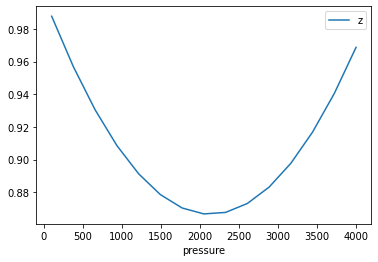

In [15]:
z = bk.z_factor(
    pressure=Pressure(value=np.linspace(100,4000,15), unit="psi"),
    temperature=Temperature(value=160, unit="farenheit"),
    critical_properties=cp_cor,
    method='papay'
)
z.plot()

In [ ]:
bk.mug(
    pressure=p1,
    temperature=t1,
    rhog=10,
    ma = 17,
    method='lee_gonzalez'
)

In [ ]:
bk.cg(pressure=p1)